In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/eeg-data-set/Day 3 - Semi-Focussed or Drowsy.csv
/kaggle/input/eeg-data-set/Day 3 - Unfocussed or Sleeping.csv
/kaggle/input/eeg-data-set/Day 3 - Focussed.csv


In [2]:
import pandas as pd

In [3]:
pip install --upgrade scipy

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install --upgrade tensorflow

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras import layers
from tensorflow.python.keras.callbacks import EarlyStopping
from tensorflow.python.keras.layers import Dense, Activation, Dropout
from tensorflow.python.keras.optimizers import adam_v2
from tensorflow.python.keras.metrics import CategoricalAccuracy
from tensorflow.python.keras.models import Sequential
from keras.models import load_model, save_model

In [7]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [8]:
focussed_day1 = pd.read_csv("/kaggle/input/eeg-data-set/Day 3 - Focussed.csv")
focussed_day1 = focussed_day1.dropna(axis=0)
drowsy_day1 = pd.read_csv("/kaggle/input/eeg-data-set/Day 3 - Semi-Focussed or Drowsy.csv")
unfocussed_day1 = pd.read_csv("/kaggle/input/eeg-data-set/Day 3 - Unfocussed or Sleeping.csv")
drowsy_day1 = drowsy_day1.dropna(axis=0)
unfocussed_day1 = unfocussed_day1.dropna(axis=0)

In [9]:
merged = pd.concat([focussed_day1, drowsy_day1, unfocussed_day1])
merged

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,Class
0,4440.512821,3804.102564,5210.769231,3829.230769,4030.256410,4490.769231,3862.051282,3511.794872,4321.025641,4304.615385,4141.025641,4282.564103,4333.846154,4024.102564,Focussed
1,4440.512821,3796.410256,5205.641026,3827.179487,4030.256410,4489.230769,3858.461538,3505.128205,4311.794872,4304.615385,4144.615385,4282.564103,4335.384615,4017.948718,Focussed
2,4440.512821,3798.974359,5207.179487,3827.692308,4030.256410,4489.230769,3865.128205,3511.794872,4313.846154,4304.615385,4148.717949,4282.564103,4334.871795,4018.974359,Focussed
3,4440.512821,3801.538462,5210.256410,3830.769231,4030.256410,4490.256410,3866.153846,3511.282051,4315.897436,4304.615385,4146.666667,4282.564103,4334.358974,4022.051282,Focussed
4,4440.512821,3799.487179,5210.256410,3831.794872,4030.256410,4490.256410,3865.641026,3506.153846,4311.282051,4304.615385,4145.641026,4282.564103,4333.846154,4020.512821,Focussed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
929062,4452.820513,3960.512821,5045.641026,3844.615385,4045.641026,4325.128205,4213.846154,3943.589744,4123.589744,4309.743590,4137.435897,4283.076923,4336.923077,4101.025641,Unfocussed
929063,4455.897436,3956.410256,5051.794872,3843.589744,4043.076923,4324.615385,4214.871795,3942.051282,4120.512821,4307.179487,4144.615385,4286.153846,4335.384615,4096.923077,Unfocussed
929064,4444.102564,3960.512821,5041.025641,3831.282051,4042.564103,4323.589744,4214.871795,3949.743590,4122.564103,4309.743590,4149.743590,4287.179487,4334.871795,4096.923077,Unfocussed
929065,4438.461538,3959.487179,5031.794872,3834.358974,4042.051282,4323.076923,4216.923077,3956.410256,4124.615385,4317.435897,4155.384615,4287.692308,4334.871795,4095.384615,Unfocussed


In [10]:
test_features = ['F7', 'F3', 'P7', 'O1', 'O2', 'P8', 'AF4']
test_value_features = ['Class']

In [11]:
X_train1 = merged[test_features]
y_train1 = merged[test_value_features]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_train1, y_train1, test_size=0.2, random_state=128, stratify=y_train1)

In [13]:
y_train_encoded = pd.get_dummies(y_train)
y_test_encoded = pd.get_dummies(y_test)


In [14]:
def elu(x, alpha=1.0):
    return tf.keras.layers.ELU(alpha=alpha)(x)

In [15]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_test)

In [16]:
early_stopping = EarlyStopping(
    min_delta=0.001, 
    patience=20, 
    restore_best_weights=True,
)

In [17]:
model = Sequential([
    layers.Dense(1024, activation=elu, input_shape=[7]),  
    layers.Dropout(0.3),
    layers.Dense(1024, activation=elu),
    layers.Dropout(0.3),
    layers.Dense(1024, activation=elu),
    layers.Dropout(0.3),
    layers.Dense(1024, activation=elu),
    layers.Dropout(0.3),
    layers.Dense(1024, activation=elu),
    layers.Dropout(0.3),
    layers.Dense(3, activation='softmax')
])

In [18]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy'],
)

In [22]:
history = model.fit(X_train_scaled, y_train_encoded, batch_size=16384, epochs=150, validation_data = (X_val_scaled, y_test_encoded))

Epoch 1/150
76/76 [==============================] - 10s 132ms/step - loss: 0.2298 - accuracy: 0.9100 - val_loss: 0.1747 - val_accuracy: 0.9306
Epoch 2/150
76/76 [==============================] - 11s 139ms/step - loss: 0.2295 - accuracy: 0.9106 - val_loss: 0.1747 - val_accuracy: 0.9307
Epoch 3/150
76/76 [==============================] - 10s 136ms/step - loss: 0.2293 - accuracy: 0.9104 - val_loss: 0.1738 - val_accuracy: 0.9312
Epoch 4/150
76/76 [==============================] - 10s 133ms/step - loss: 0.2299 - accuracy: 0.9103 - val_loss: 0.1733 - val_accuracy: 0.9314
Epoch 5/150
76/76 [==============================] - 10s 131ms/step - loss: 0.2289 - accuracy: 0.9106 - val_loss: 0.1733 - val_accuracy: 0.9314
Epoch 6/150
76/76 [==============================] - 10s 131ms/step - loss: 0.2293 - accuracy: 0.9104 - val_loss: 0.1733 - val_accuracy: 0.9311
Epoch 7/150
76/76 [==============================] - 10s 131ms/step - loss: 0.2298 - accuracy: 0.9105 - val_loss: 0.1754 - val_accuracy:

In [23]:
loss, accuracy = model.evaluate(X_val_scaled, y_test_encoded)

print('Test Accuracy:', accuracy)
print("Test Loss:", loss)

9647/9647 [==============================] - 24s 2ms/step - loss: 0.1737 - accuracy: 0.9309
Test Accuracy: 0.9309346079826355
Test Loss: 0.1737126260995865


Minimum validation loss: 0.17265278100967407


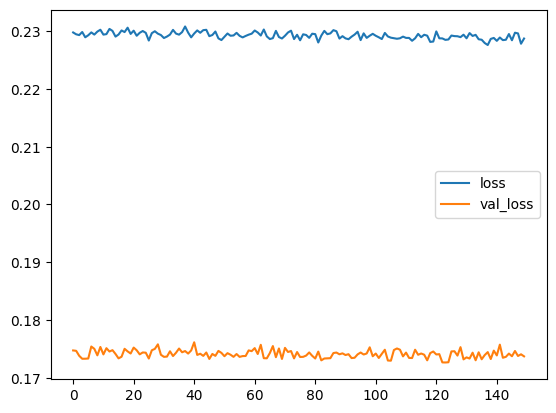

In [24]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))